From last time, we ran into some problems with the scientists data, which meant it's time to reappraise.  Some discussion with my cohort and instructor suggested a few things. First, the scientists data is hard to interprate.  Most of the data comes from Americans who are part of an IGERT grant, i.e. a Federal effort to create more interdisciplinary scholars by new funding sources.  However about a quarter of the data are Germans who are members of interdisciplinary research centers that formed organically, and then were recognized by the German government.  Second, in general scientific careers switch directions very slowly, and it's hard to do much more than categorize them.  Third, the interesting science policy question can be summed up as "Did the IGERTs work?"  Did these grants foster more interdisciplianary scholarship?

Since I really want to avoid scraping and cleaning more data, I decided to go back to the original data and evaluate them by papers. Each paper is described by several statistics.

* first_author (bool): is the first author a member of an IGERT grant
* group (categorical): Five IGERTs, A, B, C, D, E
* group_start (int): the year the group was awarded the grant
* number_authors (int) : how many authors on the paper
* sdi (float) : the Stirling Diversity Index for the paper
* times cited (int) : how many times the article has been cited
* journal (string) : the journal that published the paper
* pub_year (int) : date of publication
* velocity (float) : number of citations / years since publication. A measure of impact
* grant_product (categorical) : if the paper was published before or after the grant was awarded

We import, and run our initial descriptive stats tests

In [194]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [195]:
data = pd.read_csv('4-scientometrics101-papers.csv')
print(data.head(), '/n', data.describe())

   first_author group  group_start  number_authors       sdi  times_cited  \
0         False     A         2011               6  0.000000            0   
1         False     A         2011               3  0.373875            0   
2         False     A         2011               2  0.372381            0   
3         False     A         2011               3  0.116063            0   
4         False     A         2011               5  0.000000            0   

                      journal  pub_year  velocity grant_product  
0                   NEUROLOGY      2013       0.0          Post  
1  J. EDUC. PSYCHOL. CONSULT.      2015       0.0          Post  
2    DATA MIN. KNOWL. DISCOV.      2016       0.0          Post  
3   IEEE SIGNAL PROCESS. MAG.      2017       0.0          Post  
4               J. NEUROSURG.      2012       0.0          Post   /n        group_start  number_authors          sdi  times_cited     pub_year  \
count  3139.000000     3139.000000  3139.000000  3139.000000 

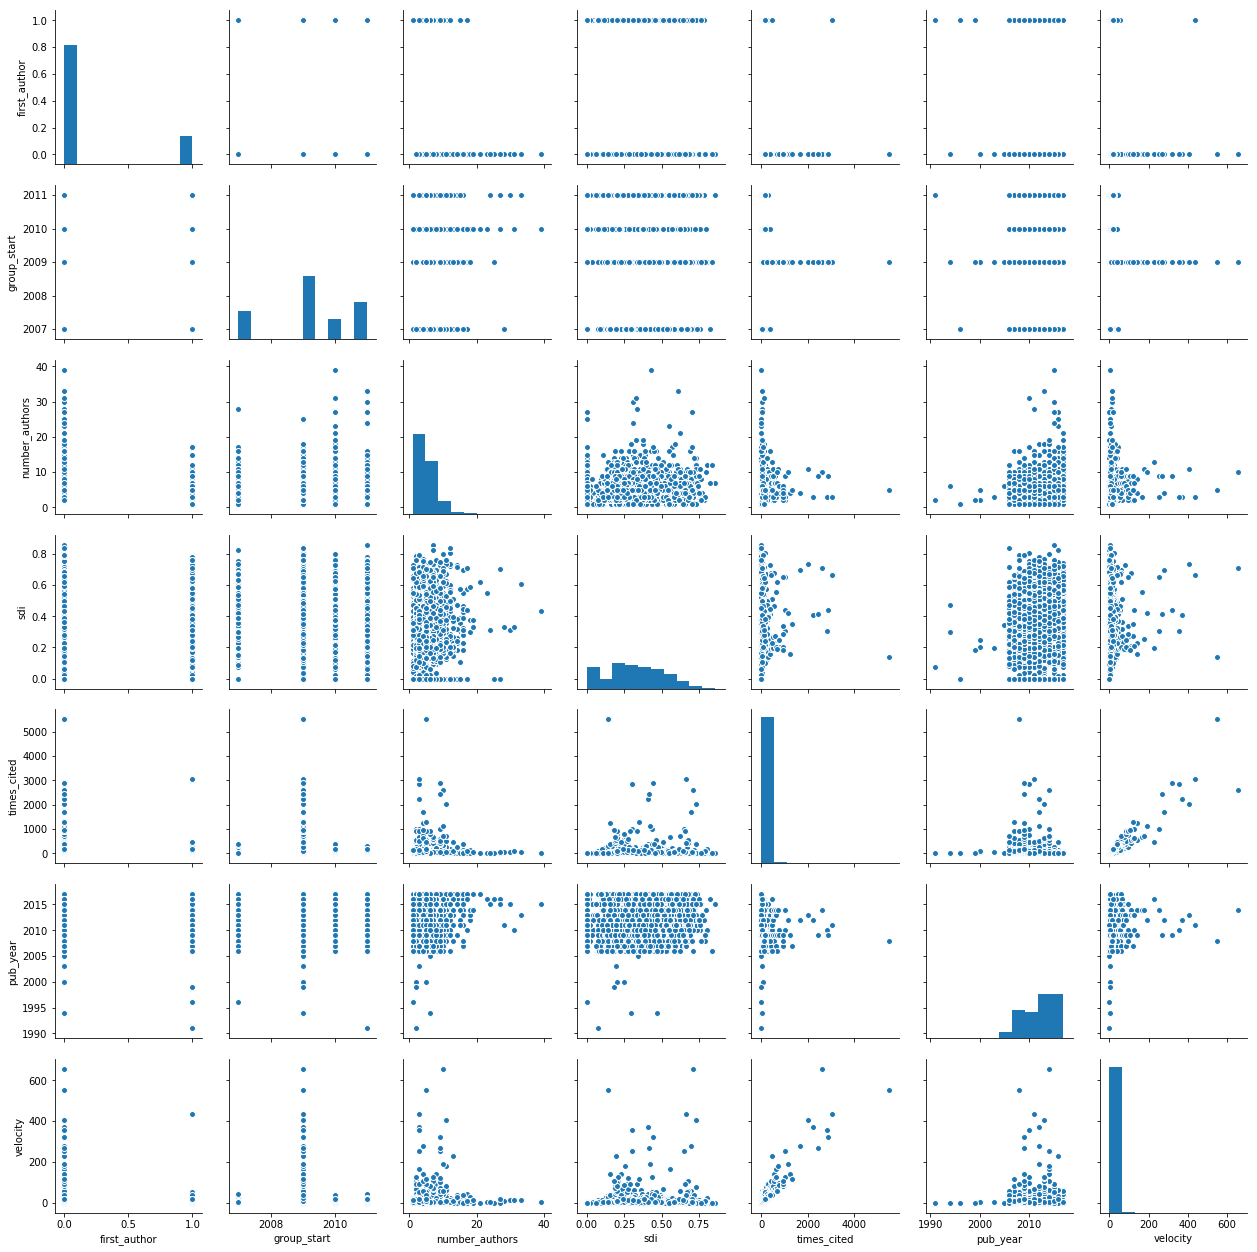

In [196]:
sns.pairplot(data)

A few things jump out. Web of Science began indexing more publications in 2005.  The distribution for number of authors and times_cites/velocity are heavily right skewed. There's no clear trend bewtween sdi and any other variable.  Papers with many authors, more than 20, don't break into the ranks of highly cited papers, which may indicate 'big science' is rarely 'impactful science.'

Let's run a few regression plots. We see weak positive effects on velocity for both sdi and number_authors.

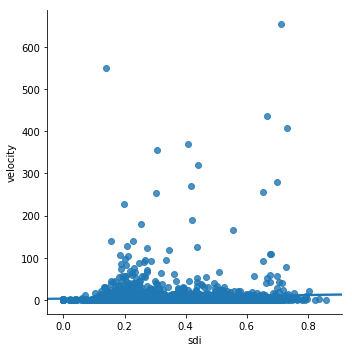

In [197]:
sns.lmplot( x="sdi", y="velocity", data=data, fit_reg=True, legend=True)

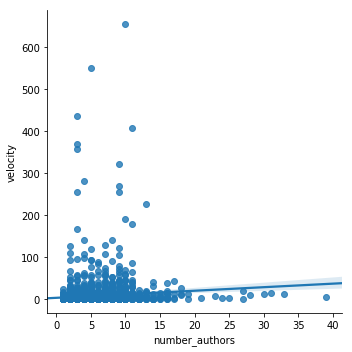

In [198]:
sns.lmplot( x="number_authors", y="velocity", data=data, fit_reg=True, legend=True)

A plot of velocity histograms shows just how right skew velocity is.

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


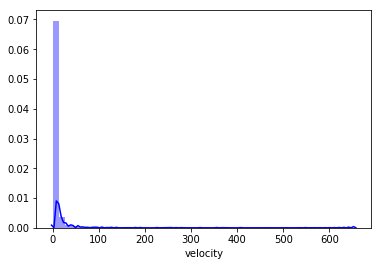

In [199]:
p1 = sns.distplot(data.velocity, color='blue')

A correlation matrix is another standard technique for looking at patterns in data. We see no particularly strong correlations, with the exception of times_cited and velocity, which makes sense since velocity is a derived statistic.  The number of authors ia also negatively correlated with the first_author being a member of the research group,

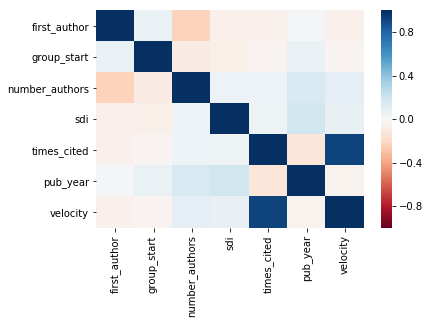

In [200]:
sns.heatmap(data.corr(), vmin=-1.0, vmax=1.0, cmap='RdBu')

In [201]:
print(data.corr())

                first_author  group_start  number_authors       sdi  \
first_author        1.000000     0.066222       -0.231499 -0.047392   
group_start         0.066222     1.000000       -0.079155 -0.060966   
number_authors     -0.231499    -0.079155        1.000000  0.062454   
sdi                -0.047392    -0.060966        0.062454  1.000000   
times_cited        -0.050353    -0.027560        0.058866  0.050597   
pub_year            0.023175     0.070309        0.163189  0.189630   
velocity           -0.054371    -0.028329        0.098471  0.076161   

                times_cited  pub_year  velocity  
first_author      -0.050353  0.023175 -0.054371  
group_start       -0.027560  0.070309 -0.028329  
number_authors     0.058866  0.163189  0.098471  
sdi                0.050597  0.189630  0.076161  
times_cited        1.000000 -0.119801  0.928066  
pub_year          -0.119801  1.000000 -0.034156  
velocity           0.928066 -0.034156  1.000000  


Now we can begin to get into some hypothesis testing.  Let's check boxplots for SDI before and after the grants were awarded.  Post grant sdis are higher. A little data manipulation shows us that post grant scores are higher for every group.

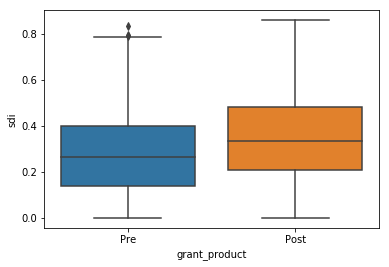

In [202]:
sns.boxplot(data=data, x='grant_product', y='sdi',  order=['Pre', 'Post'])

In [203]:
a = zip(data['group'], data['grant_product'])
b=list(a)
c = [item[0]+'-'+item[1] for item in b]
data['grant_product_pre_post']=c
data.sample(10)

boxplot_groups=list(data.grant_product_pre_post.unique())
boxplot_groups.sort(reverse=True)

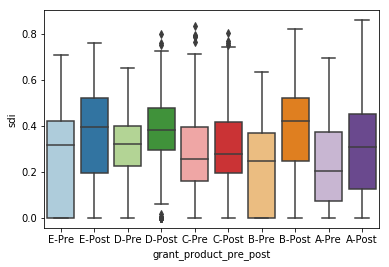

In [204]:
sns.boxplot(data=data, x='grant_product_pre_post', y='sdi', 
            order=boxplot_groups, palette="Paired")

Student's t-test is a standard check to see if two samples were drawn from the same distribution. Running it on each pair of pre and post grant groups, we find with high p-values that SDI increased after the grants were awarded.  

In short, the IGERT grants accomplished their state science policy goals!

In [205]:
from scipy import stats
print('T-test : p-value')

for letter in ['A', 'B', 'C', 'D', 'E']:
    pre = letter+'-Pre'
    post =  letter+'-Post'
    ttest = stats.ttest_ind(data.sdi[data.grant_product_pre_post==pre], 
                data.sdi[data.grant_product_pre_post==post]).pvalue
    print('Group '+letter+': %4f' % ttest) 
    

T-test : p-value
Group A: 0.008334
Group B: 0.000000
Group C: 0.008278
Group D: 0.002501
Group E: 0.000432


Finally, let's make a little bokeh graph to explore the relationship between SDI and velocity.  One thing become immediately clear. Group C (in red) dominates, both in terms of total publications, and in terms of high velocity publications.  No other group has a publication with a velocity higher than 50.  The toolbar on the side has on option to enable mousewheel-zoom.

In [208]:
from bokeh.plotting import figure, output_notebook, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.models import HoverTool, CategoricalColorMapper


category_map = CategoricalColorMapper(
    factors = ['A', 'B', 'C', 'D', 'E'],
    palette = ['purple', 'orange', 'red','green','blue'])


p =figure(title="Paper Velocity vs SDI")
p.circle(source=data, x='sdi', y='velocity', alpha=0.5, size=10,
         color={'field':'group', 'transform':category_map},
        legend='group')
hover = HoverTool(tooltips="@journal")
p.add_tools(hover)
output_file("4-paperSDI.html")
show(p)

